In [184]:
import numpy as np

test0 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,1,-1],
    [-1,1,-1,-1,-1,1,-1],
    [-1,1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))
test1 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,-1,-1,1,-1,-1,-1],
    [-1,-1,-1,1,-1,-1,-1],
    [-1,-1,-1,1,-1,-1,-1],
    [-1,-1,-1,1,-1,-1,-1],
    [-1,-1,-1,1,-1,-1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))
test2 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))

test3 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))

test4 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,-1,-1,1,1,-1,-1],
    [-1,-1,1,-1,1,-1,-1],
    [-1,1,-1,-1,1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,1,-1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))

test5 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))

test6 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))

test7 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,1,-1],
    [-1,-1,-1,-1,1,-1,-1],
    [-1,-1,-1,1,-1,-1,-1],
    [-1,-1,-1,1,-1,-1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))

test8 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))

test9 = np.array([
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,1,-1],
    [-1,1,1,1,1,1,-1],
    [-1,-1,-1,-1,-1,-1,-1]
]).reshape((49,))

patterns = [test0, test1, test2, test3, test4, test5, test6, test7, test8, test9]

In [182]:
class HammingNetwork:
    def __init__(self, n, p):
        self.n = n # кол-во входов
        self.p = p # patterns (образы)
        # 1 слой 
        self.weights1 = []
        # 2 слой
        self.weights2 = np.full((p, p), -1/(p-1))
        np.fill_diagonal(self.weights2, 1)
        # функция активации
        self.act = lambda x: x if x >= 0 else 0
        # макс. ошибка
        self.E = 0.1


    def train(self, patterns):
        self.weights1 = patterns

    def predict(self, state):
        first_state = np.dot(self.weights1, state)
        new_state = list(map(self.act, first_state))

        while len(state)>10 or np.linalg.norm(new_state - state) > self.E:
            state = new_state
            new_state = np.array(list(map(self.act,np.dot(self.weights2, state))))
        
        if sum(new_state > 0) > 1:
            return -1
        return np.argmax(new_state)

class HopfieldNetwork:
    def __init__(self, n):
        self.n = n
        self.weights = np.zeros((n, n))

    def train(self, patterns):
        self.weights = sum([np.outer(i,i) for i in patterns])/self.n
        np.fill_diagonal(self.weights, 0)

    def predict(self, state):
        new_state = np.sign(np.dot(self.weights, state))
        while not np.array_equal(new_state, state):
            state = new_state
            new_state = np.sign(np.dot(self.weights, state))
        return new_state

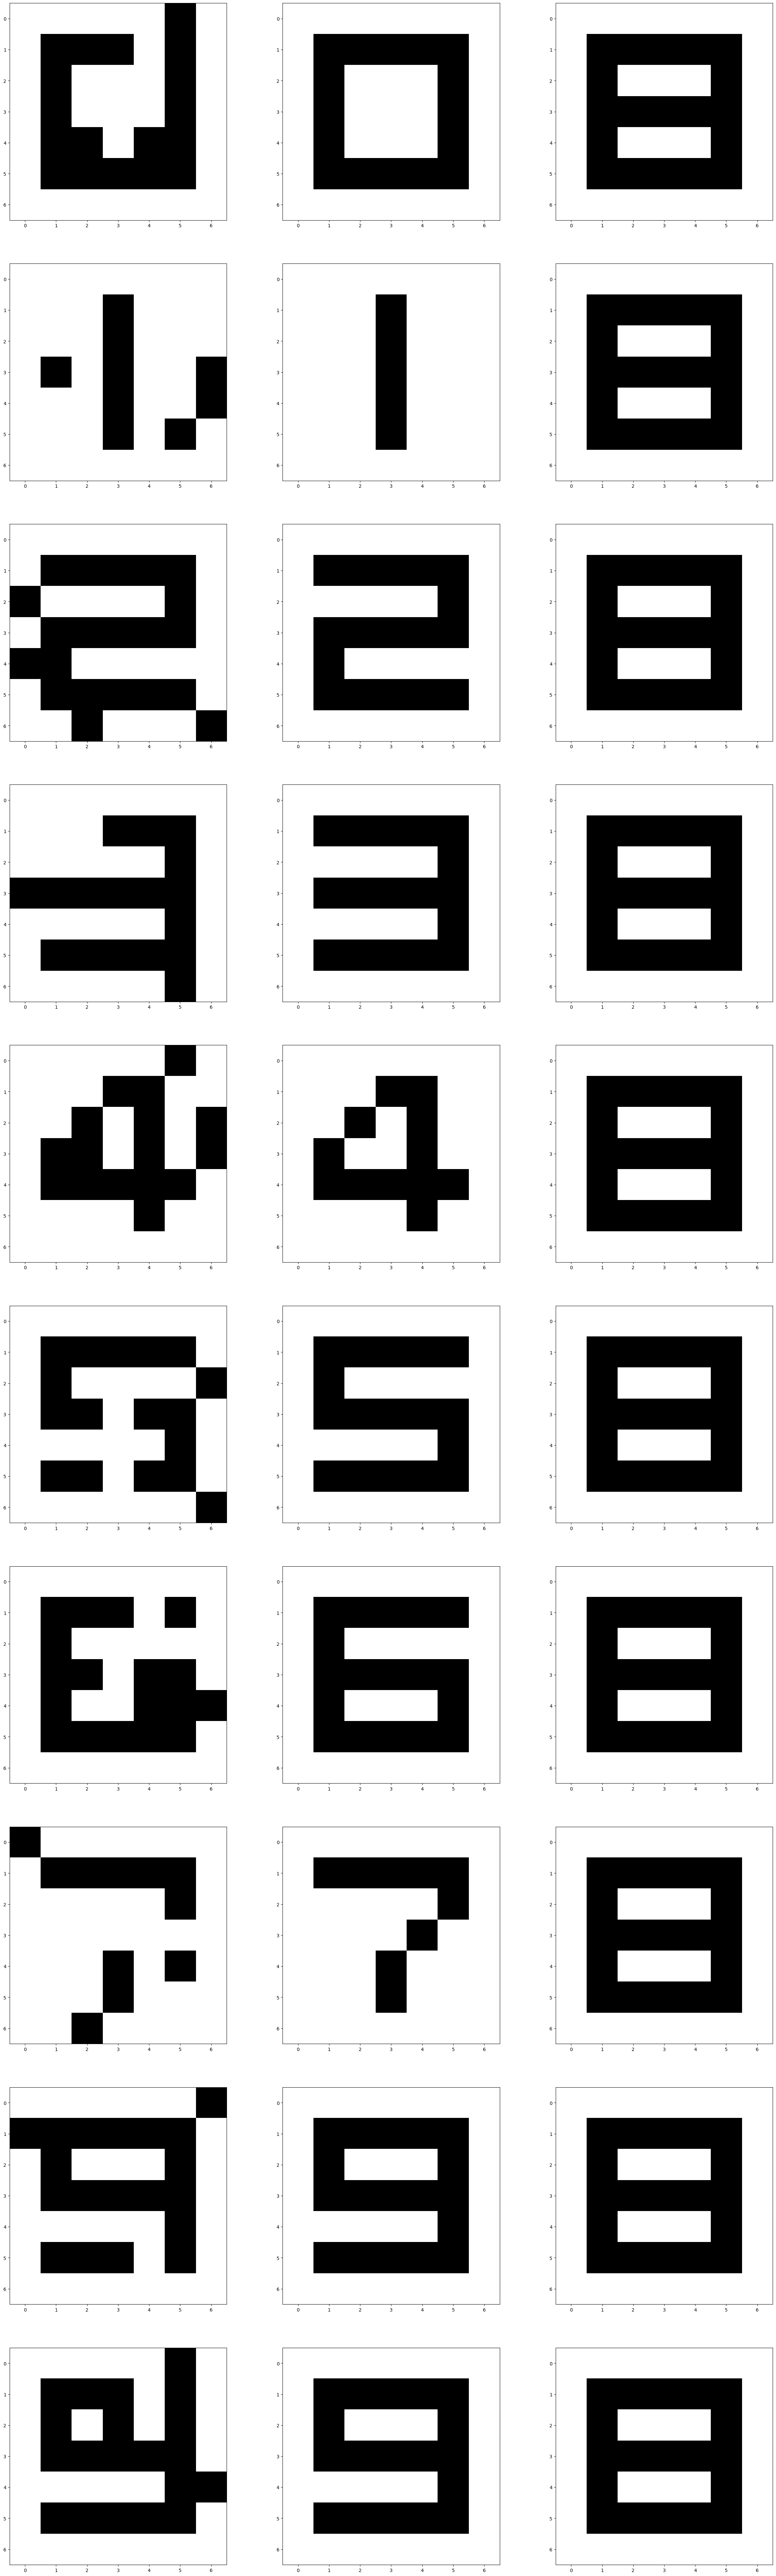

In [188]:

hmNN = HammingNetwork(49, 10)
hpfNN = HopfieldNetwork(49)


hmNN.train(patterns)
hpfNN.train(patterns)

def add_noise(array, noise_level=0.1):
    num_pixels_to_noise = int(len(array) * noise_level)
    noise_indices = np.random.choice(len(array), num_pixels_to_noise, replace=False)
    array[noise_indices] *= -1
    return array


import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 3, figsize=(30,100))

for i in range(10):
    test = add_noise(patterns[i].copy())
    pred1 = hmNN.predict(test)
    pred2 = hpfNN.predict(test)

    axes[i][0].imshow(test.reshape((7,7)), cmap='binary')
    pred1 = patterns[pred1] if pred1 != -1 else test
    axes[i][1].imshow(pred1.reshape((7,7)), cmap='binary')
    axes[i][2].imshow(pred2.reshape((7,7)), cmap='binary')



plt.show()
